 # Data Visualisation

## 1. Importing Library and Dataset

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Data/onlinefraud.csv')

## 2. Exploring the dataset

### Columns and what they represent:


- __step__: represents a unit of time where 1 step equals 1 hour
- __type__: type of online transaction
- __amount__: the amount of the transaction
- __nameOrig__: customer starting the transaction
- __oldbalanceOrg__: balance before the transaction
- __newbalanceOrig__: balance after the transaction
- __nameDest__: recipient of the transaction
- __oldbalanceDest__: initial balance of recipient before the transaction
- __newbalanceDest__: the new balance of recipient after the transaction
- __isFraud__: fraud transaction

In [3]:
print(df.head()) 

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
#check the dimensions of the dataset
print(df.shape)

(6362620, 11)


In [7]:
#checking info of data and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
# use isnull().sum() to check for missing values 
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values in the dataset

#### Transaction Statistics

In [33]:
Not_fraud_count = df[df['isFraud'] == 0]
is_fraud_count = df[df['isFraud'] == 1]
flagged_fraud_records = df[df['isFlaggedFraud'] == 1]


print('Based on the ',df.shape[0], ' records in the dataset:')
print('The number of records that are not fraud: ',Not_fraud_count.size)
print('The number of records that are not fraud: ',is_fraud_count.size)
print('The number of records that are fraud and have actually been classified as fraud: ',flagged_fraud_records.size)

Based on the  6362620  records in the dataset:
The number of records that are not fraud:  76252884
The number of records that are not fraud:  98556
The number of records that are fraud and have actually been classified as fraud:  192


## 3. Distribution Statistics of the Dataset

### Graph 1: Distribution of Transaction Types

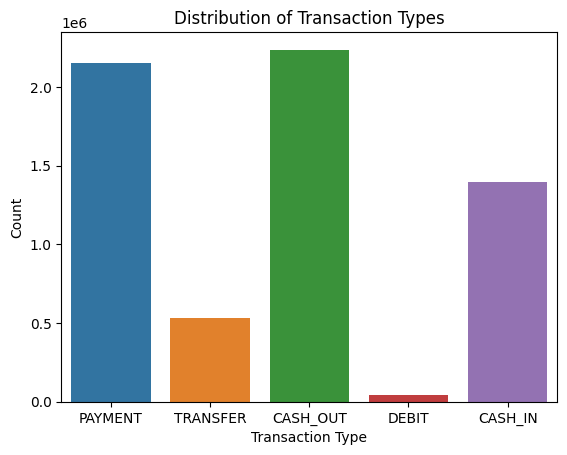

In [4]:
sns.countplot(x='type', data=df)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

#### Interpretation of above graph

__Cash_Out__ seems to be the most common transaction type, followed by __Payment__ and then __Cash_In__

### Graph 2: Distribution of Transaction Types by Fraud

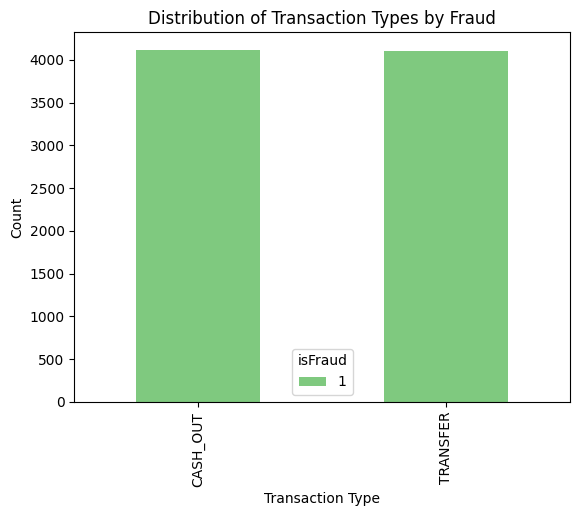

In [45]:
# Group the data by transaction type and fraud
grouped_data = df.query('isFraud == 1').groupby(['type','isFraud']).size().unstack()

# Plot the stacked bar graph
grouped_data.plot(kind='bar', stacked=True,colormap='Accent')

# Set the axis labels and title
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types by Fraud')

# Display the plot
plt.show()

#### Interpretation of above graph

__Cash_Out__ and __Transfer__ are both transaction types that contain fraud transaction records 

### Graph 3: Fraudulent Transactions Percent

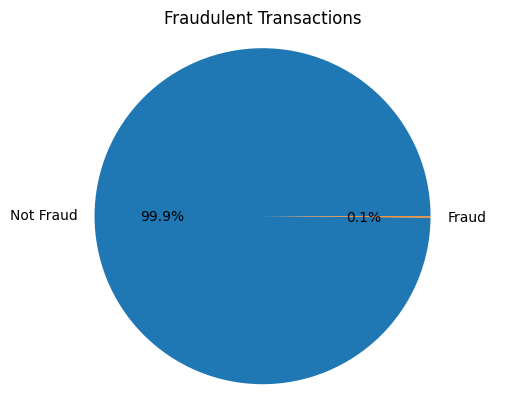

In [5]:
fraud_counts = df['isFraud'].value_counts()
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%')
plt.title('Fraudulent Transactions')
plt.axis('equal')
plt.show()

#### Interpretation of above graph

This dataset contains only 0.1% fraudulent transactions but that is only because the dataset is huge and meant to represent the real world

### Graph 4: Comparison of Actual Fraud and Flagged Fraud

In [6]:
flagged_fraud_records = df[df['isFlaggedFraud'] == 1]
print(flagged_fraud_records.size)

176


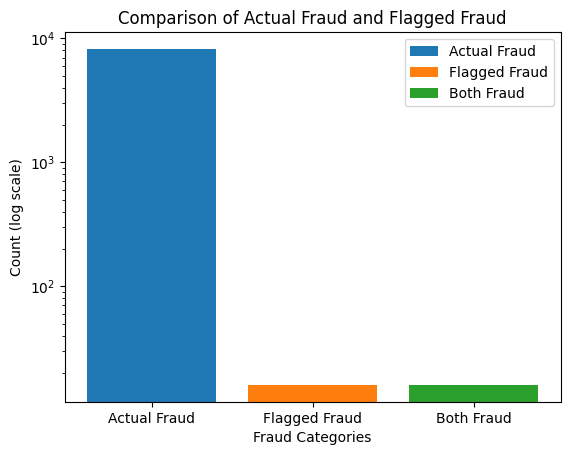

In [7]:
actual_fraud_count = len(df[df['isFraud'] == 1])
flagged_fraud_count = len(df[df['isFlaggedFraud'] == 1])
both_fraud_count = len(df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)])

plt.bar(['Actual Fraud'], [actual_fraud_count], label='Actual Fraud')
plt.bar(['Flagged Fraud'], [flagged_fraud_count], label='Flagged Fraud')
plt.bar(['Both Fraud'], [both_fraud_count], label='Both Fraud')

plt.xlabel('Fraud Categories')
plt.ylabel('Count (log scale)')
plt.yscale('log')  # I used logarithmic axes to actually show the data
plt.title('Comparison of Actual Fraud and Flagged Fraud')
plt.legend()
plt.show()

#### Interpretation of above graph

This graph shows us the real world rate of identifying fradulent transactions occuring and gives us a goal to beat the current flag rate

### Graph 5 and 6: Fraud Rate by Amount Intervals

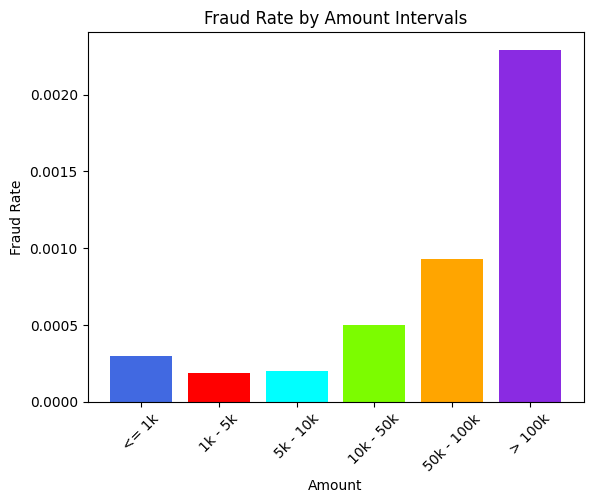

In [30]:
amount_bins = [0, 1000, 5000, 10000, 50000, 100000, np.inf]
bin_labels = ['<= 1k', '1k - 5k', '5k - 10k', '10k - 50k', '50k - 100k', '> 100k']

df['amount_bin'] = pd.cut(df['amount'], bins=amount_bins, labels=bin_labels)

fraud_rate = df.groupby('amount_bin')['isFraud'].mean()

plt.bar(bin_labels, fraud_rate, color=['royalblue', 'red', 'aqua', 'lawngreen', 'orange','blueviolet'])
plt.xlabel('Amount')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Amount Intervals')
plt.xticks(rotation=45)
plt.show()

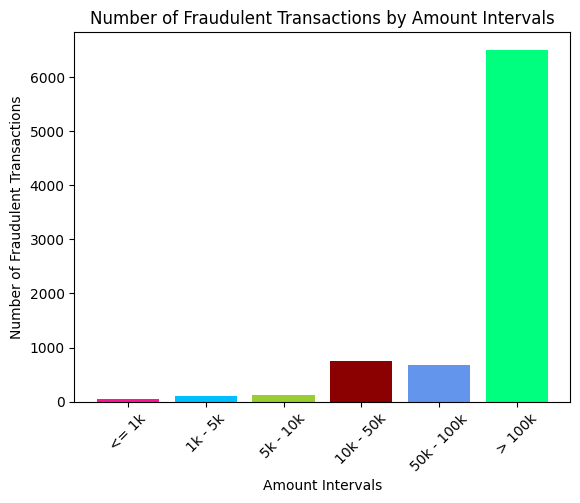

In [46]:
fraudulent_transactions = df[df['isFraud'] == 1]

amount_bins = [0, 1000, 5000, 10000, 50000, 100000, np.inf]
bin_labels = ['<= 1k', '1k - 5k', '5k - 10k', '10k - 50k', '50k - 100k', '> 100k']

fraudulent_transactions.loc[:, 'amount_bin'] = pd.cut(fraudulent_transactions['amount'], bins=amount_bins, labels=bin_labels)

fraud_counts = fraudulent_transactions['amount_bin'].value_counts().sort_index()

plt.bar(bin_labels, fraud_counts,color=['deeppink', 'deepskyblue', 'yellowgreen', 'darkred', 'cornflowerblue','springgreen'])
plt.xlabel('Amount Intervals')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Amount Intervals')
plt.xticks(rotation=45)
plt.show()

#### Interpretation of above graphs

the higher the amount being processed, the more likely it is to be fraud

## 4. Dataset splitting

In [51]:
## Splitting dataset into 80% Training and 20% Testing Data:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,train_size=0.8, random_state =42)

# random_state is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for 
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (5090096, 11)
The shape of X_test is: (1272524, 11)

The shape of Y_train is: (5090096,)
The shape of Y_test is: (1272524,)
